<a href="https://www.kaggle.com/code/samithsachidanandan/cnn-tensorflow-pytorch?scriptVersionId=278599015" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install protobuf==3.20.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 5.4 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.33.0
    Uninstalling protobuf-6.33.0:
      Successfully uninstalled protobuf-6.33.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 3.20.3 which is incompatible.
onnx 1.18.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
a2a-sdk 0.3.10 requires protobuf>=5.29.5, but you have protobuf 3.20.3 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.2.0 which is incompatible.
tensorflow-me

# TensorFlow

In [2]:
import tensorflow as tf 
from tensorflow.keras import datasets, layers, models

import matplotlib.pyplot as plt 

2025-11-16 07:45:58.493964: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763279158.694673      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763279158.745037      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
(train_images, train_labels),(test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images/255.0,  test_images/255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


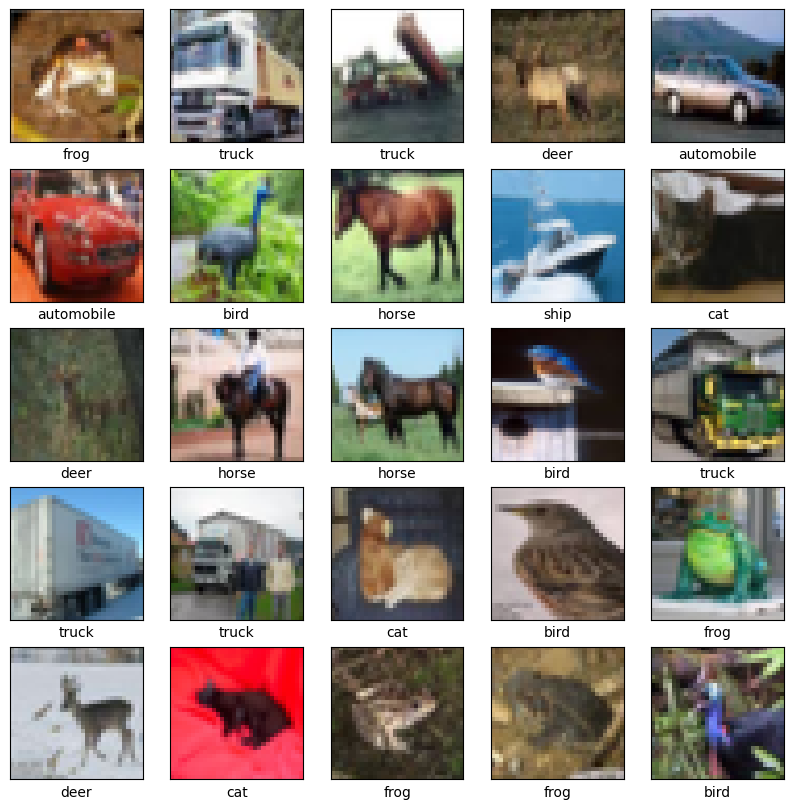

In [4]:
classes = ('ariplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck')

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(classes[train_labels[i][0]])

plt.show()

In [5]:
# model 
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1763279182.320972      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [7]:
history = model.fit(train_images, train_labels, epochs=100, validation_split = 0.2)

Epoch 1/100


I0000 00:00:1763279193.055349      69 service.cc:148] XLA service 0x7de32400a5d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763279193.055851      69 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1763279193.841330      69 cuda_dnn.cc:529] Loaded cuDNN version 90300


  30/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.1435 - loss: 3.2927

I0000 00:00:1763279199.928427      69 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step - accuracy: 0.2906 - loss: 2.2171 - val_accuracy: 0.5215 - val_loss: 1.2969
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.5224 - loss: 1.3297 - val_accuracy: 0.6102 - val_loss: 1.0784
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6118 - loss: 1.0969 - val_accuracy: 0.5872 - val_loss: 1.1943
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.6721 - loss: 0.9515 - val_accuracy: 0.7342 - val_loss: 0.7688
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7071 - loss: 0.8564 - val_accuracy: 0.6994 - val_loss: 0.8721
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7305 - loss: 0.7982 - val_accuracy: 0.7077 - val_loss: 0.8701
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7557 - loss: 0.7295 - val_accuracy: 0.7430 - val_loss: 0.7550
Epoch 8/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7720 - loss: 0.6787 - val

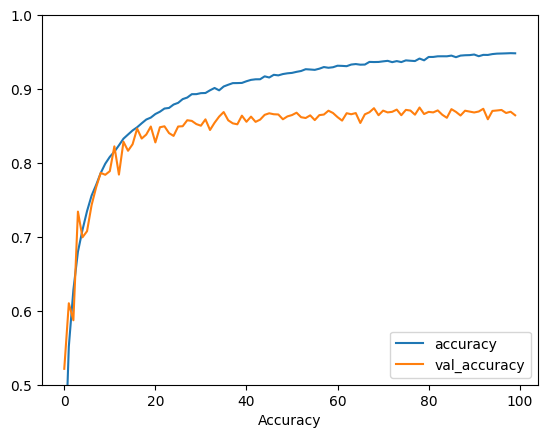

In [8]:
# Plot history 

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.xlabel('Accuracy')
plt.ylim([0.5,1])
plt.legend(loc='lower right')

In [9]:
# Evaluation 
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_loss, test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.8606 - loss: 0.5256
0.5256243944168091 0.8605999946594238


# PyTorch

In [10]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import numpy as np 

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [12]:
# Hyperparameter 
batch_size = 32 

In [13]:
# Dataset and Dataloader 
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True, 
    download=True,
    transform=transform
)

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True,
    num_workers=2
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False, 
    download=True,
    transform=transform
)

testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False,
    num_workers=2
)


100%|██████████| 170M/170M [00:03<00:00, 49.1MB/s]


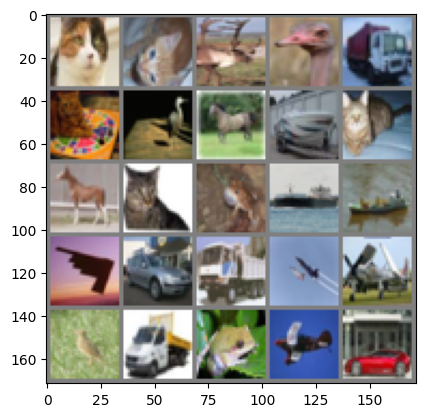

cat   cat   deer  bird  truck cat   bird  horse ship  cat   horse cat   frog  ship  ship  airplane automobile truck airplane airplane bird  truck frog  airplane automobile


In [14]:
classes = ('airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

def imshow(imgs):
    imgs = imgs / 2 + 0.5  # unnormalize if normalized to [-1, 1]
    npimgs = imgs.numpy()
    plt.imshow(np.transpose(npimgs, (1, 2, 0)))
    plt.show()

# One batch of random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)  # Updated line here

img_grid = torchvision.utils.make_grid(images[0:25], nrow=5)
imshow(img_grid)
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(25)))

In [15]:
#Model 

class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 32, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(2,2)
        self.dropout1 = nn.Dropout2d(0.25)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 64, 3, padding=1)
        self.bn4 = nn.BatchNorm2d(64)
        self.dropout2 = nn.Dropout2d(0.25)
        self.conv5 = nn.Conv2d(64, 128, 3, padding=1)
        self.bn5 = nn.BatchNorm2d(128)
        self.conv6 = nn.Conv2d(128, 128, 3, padding=1)
        self.bn6 = nn.BatchNorm2d(128)
        self.dropout3 = nn.Dropout2d(0.4)
        self.fc1 = nn.Linear(128*4*4, 256)
        self.bn7 = nn.BatchNorm1d(256)
        self.dropout4 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 128)
        self.bn8 = nn.BatchNorm1d(128)
        self.dropout5 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(128, 10)
        
    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = self.dropout1(x)
        x = F.relu(self.bn3(self.conv3(x)))
        x = F.relu(self.bn4(self.conv4(x)))
        x = self.pool(x)
        x = self.dropout2(x)
        x = F.relu(self.bn5(self.conv5(x)))
        x = F.relu(self.bn6(self.conv6(x)))
        x = self.pool(x)
        x = self.dropout3(x)
        x = torch.flatten(x, 1)
        x = F.relu(self.bn7(self.fc1(x)))
        x = self.dropout4(x)
        x = F.relu(self.bn8(self.fc2(x)))
        x = self.dropout5(x)
        x = self.fc3(x)
        return x

model = ConvNet().to(device)

In [16]:
# Loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [17]:
#Training
steps_per_epoch = len(trainloader)
for epoch in range(100):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for (inputs, labels) in trainloader:
        inputs = inputs.to(device)
        labels = labels.to(device)
        #forward + loss
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        # backward + optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        
        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_accuracy = 100 * correct / total
    print(f'[{epoch + 1}] loss: {running_loss / steps_per_epoch:.3f} accuracy: {train_accuracy:.2f}%')
    
print('Finishes Training')

[1] loss: 1.672 accuracy: 38.48%
[2] loss: 1.318 accuracy: 52.90%
[3] loss: 1.167 accuracy: 59.38%
[4] loss: 1.059 accuracy: 63.16%
[5] loss: 0.986 accuracy: 66.03%
[6] loss: 0.921 accuracy: 68.56%
[7] loss: 0.874 accuracy: 70.36%
[8] loss: 0.828 accuracy: 71.80%
[9] loss: 0.793 accuracy: 73.30%
[10] loss: 0.764 accuracy: 74.37%
[11] loss: 0.733 accuracy: 75.22%
[12] loss: 0.713 accuracy: 76.22%
[13] loss: 0.682 accuracy: 77.24%
[14] loss: 0.667 accuracy: 77.59%
[15] loss: 0.653 accuracy: 78.22%
[16] loss: 0.633 accuracy: 78.66%
[17] loss: 0.615 accuracy: 79.30%
[18] loss: 0.605 accuracy: 80.06%
[19] loss: 0.587 accuracy: 80.55%
[20] loss: 0.577 accuracy: 80.76%
[21] loss: 0.568 accuracy: 80.83%
[22] loss: 0.550 accuracy: 81.61%
[23] loss: 0.533 accuracy: 82.18%
[24] loss: 0.530 accuracy: 82.23%
[25] loss: 0.525 accuracy: 82.66%
[26] loss: 0.522 accuracy: 82.70%
[27] loss: 0.506 accuracy: 83.05%
[28] loss: 0.502 accuracy: 83.15%
[29] loss: 0.493 accuracy: 83.58%
[30] loss: 0.488 accura

In [18]:
# Evaluation 
n_correct = 0
n_total = 0 

model.eval()

with torch.no_grad():
    for (images, labels) in testloader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        n_total += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        

print(f'Accuracy on test set: {n_correct / n_total: .3f}')


Accuracy on test set:  0.852
